### **There are a lot of questions we can answer using a dataset such as this one. Some questions are related to**

1. Popularity
2. What makes a person charismatic ?
3. Census and demographic studies.
4. How to make the best first impression in order to get more matches (and ultimately find love, or new friendships) ?
7. How do charismatic people present themselves ?

In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file1 = '/content/drive/MyDrive/Dating App Dataset/users_api-results.csv'
users_instances = pd.read_csv(file1)
users_instances

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,F,M,21,B**f,0.85,1,280,15,0,0,...,1,2015-04-07T00:08:59Z,1.428365e+09,0,1.0,NaN,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN
3969,F,M,20,Ma**e,1.00,8,1014,43,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3970,F,M,20,Ma**e,1.00,8,1101,46,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYVOrW7zgSV+NPGili4nZeREmQ0rAAXCZunTXp9KRLat1...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3971,F,M,23,Eni**n,0.96,8,8702,142,0,0,...,0,2015-04-06T15:47:15Z,1.428335e+09,0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN


In [ ]:
users_instances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3973 non-null   object 
 1   genderLooking           3973 non-null   object 
 2   age                     3973 non-null   int64  
 3   name                    3973 non-null   object 
 4   counts_details          3973 non-null   float64
 5   counts_pictures         3973 non-null   int64  
 6   counts_profileVisits    3973 non-null   int64  
 7   counts_kisses           3973 non-null   int64  
 8   counts_fans             3973 non-null   int64  
 9   counts_g                3973 non-null   int64  
 10  flirtInterests_chat     3973 non-null   bool   
 11  flirtInterests_friends  3973 non-null   bool   
 12  flirtInterests_date     3973 non-null   bool   
 13  country                 3973 non-null   object 
 14  city                    3686 non-null   

In [ ]:
users_instances = users_instances.query('age not in [18, 27, 28]')

# **Popularity Score**

> **Normalize the Columns**

In [ ]:
columns_to_normalize = ["counts_pictures", "counts_profileVisits", "counts_kisses", "counts_fans"]
for col in columns_to_normalize:
    users_instances[f"{col}_zscore"] = (users_instances[col] - users_instances[col].mean()) / users_instances[col].std()

<ipython-input-5-67309b6d6a88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances[f"{col}_zscore"] = (users_instances[col] - users_instances[col].mean()) / users_instances[col].std()
<ipython-input-5-67309b6d6a88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances[f"{col}_zscore"] = (users_instances[col] - users_instances[col].mean()) / users_instances[col].std()
<ipython-input-5-67309b6d6a88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

**Calculating Popularity Score**

> **Importance of Metrics**

> **Adding Is_popular Column**





In [ ]:
# Calculate Popularity Score
users_instances["popularity_score"] = round(
    (
        (users_instances["counts_pictures_zscore"] * 0.1) +
        (users_instances["counts_profileVisits_zscore"] * 0.2) +
        (users_instances["counts_kisses_zscore"] * 0.4) +
        (users_instances["counts_fans_zscore"] * 0.3)
    ) / 4, 2
)

users_instances['is_popular'] = users_instances['popularity_score'] > users_instances['popularity_score'].median()

<ipython-input-6-d561d160dc0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["popularity_score"] = round(
<ipython-input-6-d561d160dc0b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['is_popular'] = users_instances['popularity_score'] > users_instances['popularity_score'].median()




> **Contribution Breakdown**



In [ ]:
users_instances['contribution_pictures'] = users_instances['counts_pictures'] * 0.1
users_instances['contribution_visits'] = users_instances['counts_profileVisits'] * 0.2
users_instances['contribution_kisses'] = users_instances['counts_kisses'] * 0.4
users_instances['contribution_fans'] = users_instances['counts_fans'] * 0.3

# Analyze average contributions
average_contributions = users_instances[['contribution_pictures', 'contribution_visits', 'contribution_kisses', 'contribution_fans']].mean()
print(average_contributions)

contribution_pictures      0.478665
contribution_visits      742.141209
contribution_kisses       62.789924
contribution_fans          0.703904
dtype: float64


<ipython-input-7-fbf016fb70d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['contribution_pictures'] = users_instances['counts_pictures'] * 0.1
<ipython-input-7-fbf016fb70d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['contribution_visits'] = users_instances['counts_profileVisits'] * 0.2
<ipython-input-7-fbf016fb70d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



> **What Makes Users Unpopular?**



In [ ]:
popular_users = users_instances[users_instances['is_popular'] == True]
print(popular_users[['counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans']].mean())

counts_pictures            7.116341
counts_profileVisits    7097.919090
counts_kisses            306.952406
counts_fans                4.751983
dtype: float64


In [ ]:
unpopular_users = users_instances[users_instances['is_popular'] == False]
print(unpopular_users[['counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans']].mean())

counts_pictures           2.667629
counts_profileVisits    629.792208
counts_kisses            20.559404
counts_fans               0.158249
dtype: float64



*  The popular_users has 4 times more profile visit than unpopular_users
*  Fan count is almost zero for unpopular users





> **Popularity by Age**



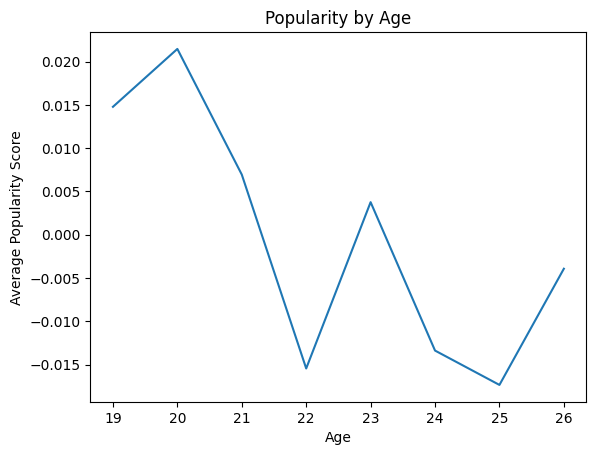

In [ ]:
age_popularity = users_instances.groupby('age')['popularity_score'].mean()

plt.plot(age_popularity.index, age_popularity.values)
plt.xlabel('Age')
plt.ylabel('Average Popularity Score')
plt.title('Popularity by Age')
plt.show()



>**Popular vs. Unpopular Comparison**


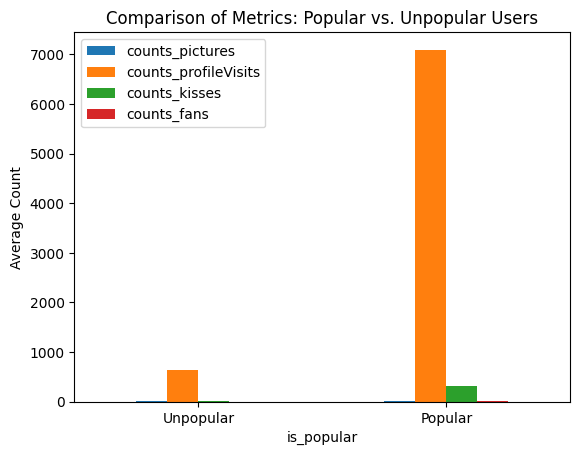

In [ ]:
# Compare popular and unpopular users
comparison = users_instances.groupby('is_popular')[['counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()

# Plot
comparison.plot(kind='bar')
plt.title('Comparison of Metrics: Popular vs. Unpopular Users')
plt.ylabel('Average Count')
plt.xticks([0, 1], ['Unpopular', 'Popular'], rotation=0)
plt.show()

> **Patterns Across Popular Users**


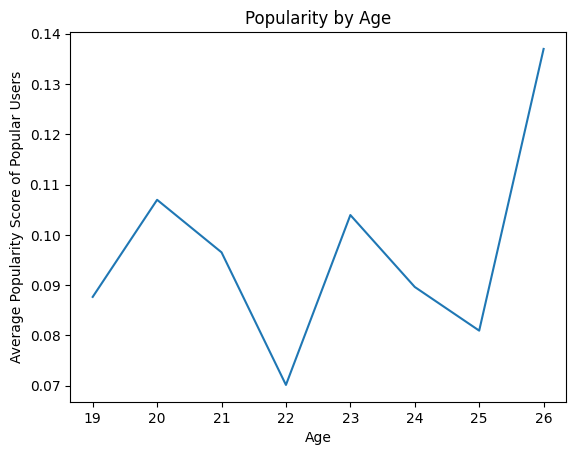

In [ ]:
age_popularity_of_popular_users = popular_users.groupby('age')['popularity_score'].mean()

plt.plot(age_popularity_of_popular_users.index, age_popularity_of_popular_users.values)
plt.xlabel('Age')
plt.ylabel('Average Popularity Score of Popular Users')
plt.title('Popularity by Age')
plt.show()

Popularity appears to be driven by higher visibility, active engagement (e.g., having fans), and potentially age-related appeal, where slightly older users are more likely to achieve or sustain popularity among popular users while 20 age users seems on average shows more popularity. These factors suggest that a combination of user traits and external interaction patterns determines popularity.

# **Charisma Score**

Charisma reflects the user's ability to attract meaningful interactions, such as kisses and fans, rather than just sheer volume of interactions like profile visits or picture count.


> Engagement Rate


*   Definition: The engagement rate measures how effectively a user's profile generates interactions (kisses, fans) relative to the number of profile visits. A higher engagement rate means that a user is able to attract more meaningful interactions per profile visit.

*  Formula: Engagement Rate = (count_kisses + count_fans)/count_profileVisits



> Picture Effectiveness

*   Definition: This metric shows how effective the pictures uploaded by a user are at generating engagement (kisses and fans). It compares the number of interactions (kisses and fans) to the number of pictures, emphasizing the
quality of interactions per picture.

*   Formula: Picture Effectiveness = (count_kisses+count_fans)/count_pictures










In [ ]:
users_instances["engagement_rate"] = round((users_instances["counts_kisses"] + users_instances["counts_fans"] ) / users_instances["counts_profileVisits"], 2)
users_instances["picture_effectiveness"] = round((users_instances["counts_kisses"] + users_instances["counts_fans"] ) / users_instances["counts_pictures"], 2)

<ipython-input-14-04975d44339e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["engagement_rate"] = round((users_instances["counts_kisses"] + users_instances["counts_fans"] ) / users_instances["counts_profileVisits"], 2)
<ipython-input-14-04975d44339e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["picture_effectiveness"] = round((users_instances["counts_kisses"] + users_instances["counts_fans"] ) / users_instances["counts_pictures"], 2)


In [ ]:
users_instances["charisma_score"] = round(((users_instances["engagement_rate"]* 0.6) + (users_instances["picture_effectiveness"]) *0.4) / 2, 2)

<ipython-input-15-f8423f0fa267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["charisma_score"] = round(((users_instances["engagement_rate"]* 0.6) + (users_instances["picture_effectiveness"]) *0.4) / 2, 2)


In [ ]:
users_instances['is_charismatic'] = users_instances['charisma_score'] > users_instances['charisma_score'].median()

<ipython-input-16-67f94983ba0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['is_charismatic'] = users_instances['charisma_score'] > users_instances['charisma_score'].median()


In [ ]:
charismatic_users = users_instances[users_instances['is_charismatic'] == True]
print(charismatic_users[[ 'counts_kisses', 'counts_fans']].mean())

counts_kisses    294.049566
counts_fans        4.242207
dtype: float64


In [ ]:
print('Average Engagement Rate of Charismatic Users')
print(charismatic_users[['engagement_rate']].mean())

Average Engagement Rate of Charismatic Users
engagement_rate    inf
dtype: float64


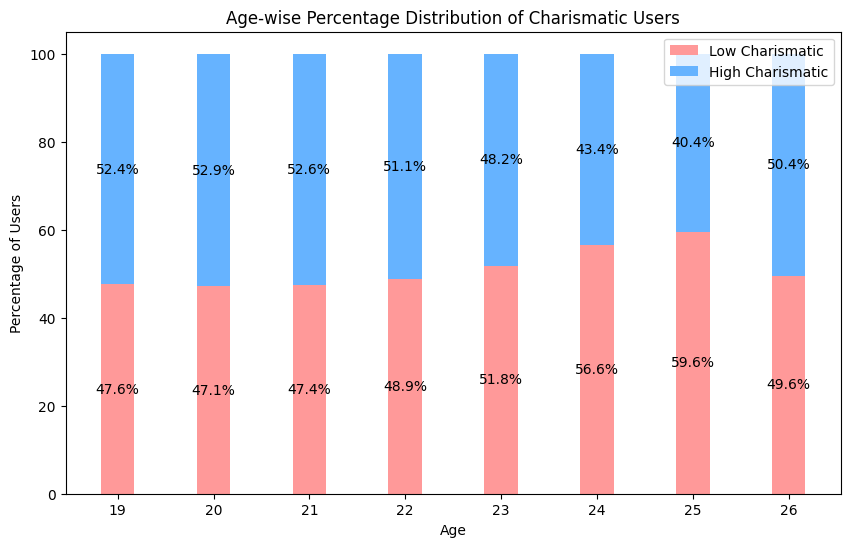

In [ ]:
# Group by age and charisma status
age_distribution = users_instances.groupby(['age', 'is_charismatic']).size().unstack(fill_value=0)

# Calculate percentages for each age group
age_distribution_percentage = age_distribution.div(age_distribution.sum(axis=1), axis=0) * 100

# Extract percentages
low_charismatic_percentage = age_distribution_percentage[False]
high_charismatic_percentage = age_distribution_percentage[True]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
ages = low_charismatic_percentage.index

# Plot the bars
low_bars = plt.bar(
    ages, low_charismatic_percentage, bar_width, label='Low Charismatic', color='#ff9999'
)
high_bars = plt.bar(
    ages, high_charismatic_percentage, bar_width, label='High Charismatic', color='#66b3ff', bottom=low_charismatic_percentage
)

# Add labels to low charismatic bars
for bar, value in zip(low_bars, low_charismatic_percentage):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f'{value:.1f}%',
        ha='center',
        va='center',
        color='black'
    )

# Add labels to high charismatic bars
for bar, value, low_value in zip(high_bars, high_charismatic_percentage, low_charismatic_percentage):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        low_value + value / 2,
        f'{value:.1f}%',
        ha='center',
        va='center',
        color='black'
    )

# Formatting the chart
plt.xlabel('Age')
plt.ylabel('Percentage of Users')
plt.title('Age-wise Percentage Distribution of Charismatic Users')
plt.xticks(ages)
plt.legend()
plt.show()

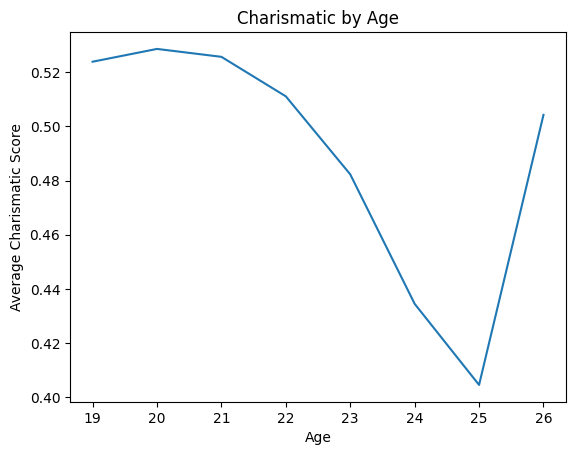

In [ ]:
age_Charismatic = users_instances.groupby('age')['is_charismatic'].mean()

plt.plot(age_Charismatic.index, age_Charismatic.values)
plt.xlabel('Age')
plt.ylabel('Average Charismatic Score')
plt.title('Charismatic by Age')
plt.show()

# **3. Census and Demographic Studies**


In [ ]:
charismatic_popular_users = users_instances[(users_instances['is_charismatic'] == True) & (users_instances['is_popular'] == True)]

# Gender Distribution
print("\n### Gender Distribution (Sorted) ###")
gender_dist = charismatic_popular_users['gender'].value_counts().sort_values(ascending=False)
gender_dist


### Gender Distribution (Sorted) ###


,count
gender,
F,1441


In [ ]:
# Gender Preferences
print("\n### Gender Preferences (Sorted) ###")
gender_prefs = charismatic_popular_users.groupby(['gender', 'genderLooking']).size().reset_index(name='count')
gender_prefs = gender_prefs.sort_values(by='count', ascending=False)
gender_prefs


### Gender Preferences (Sorted) ###


,gender,genderLooking,count
1,F,M,1278
3,F,none,146
2,F,both,10
0,F,F,7


In [ ]:
# Geographic Trends
print("\n### Geographic Trends (Sorted) ###")
country_dist = charismatic_popular_users['country'].value_counts().sort_values(ascending=False)
print("Country Distribution:")
print(country_dist)

city_dist = charismatic_popular_users['city'].value_counts().sort_values(ascending=False)
print("\nCity Distribution:")
print(city_dist)



### Geographic Trends (Sorted) ###
Country Distribution:
country
CH    756
DE    400
FR    211
IT     33
AT     10
ES      4
US      3
BE      3
BA      2
SC      2
RU      2
BR      1
LR      1
LI      1
CA      1
NL      1
AU      1
JM      1
AR      1
LU      1
ID      1
ET      1
HU      1
GB      1
CZ      1
IN      1
Name: count, dtype: int64

City Distribution:
city
Zürich                92
Bern                  64
Köln                  38
Basel                 36
Lausanne              35
                      ..
Apricale               1
Toulon-la-Montagne     1
Vaux-sous-Aubigny      1
Frick                  1
Lauchringen            1
Name: count, Length: 646, dtype: int64


In [ ]:
# Language Preferences
print("\n### Language Preferences (Sorted) ###")
lang_cols = ['lang_count', 'lang_fr', 'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt']
lang_pref = charismatic_popular_users[lang_cols].sum().sort_values(ascending=False)
lang_pref


### Language Preferences (Sorted) ###


,0
lang_count,1744
lang_de,990
lang_fr,407
lang_en,133
lang_it,78
lang_es,37
lang_pt,17


# **Statistics about the interest of people joining Dating Apps**



> **Analyze the Distribution of Interests**





In [ ]:
import pandas as pd

columns_of_interest = [
    'gender', 'genderLooking', 'age', 'country', 'city', 'flirtInterests_chat',
    'flirtInterests_friends', 'flirtInterests_date', 'counts_details', 'counts_pictures',
    'counts_profileVisits', 'counts_kisses', 'counts_fans', 'counts_g', 'isFlirtstar',
    'isHighlighted', 'isInfluencer', 'isMobile', 'isVip', 'isOnline', 'verified'
]

data = users_instances[columns_of_interest]

print("\n### Distribution of Interests ###")
interests_dist = data[['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']].sum()
interests_dist = interests_dist.sort_values(ascending=False)
print(interests_dist)

# Normalize interest distribution (percentage)
total_users = len(data)
interests_percentage = (interests_dist / total_users) * 100
print("\nInterest Distribution Percentage:")
print(interests_percentage)


### Distribution of Interests ###
flirtInterests_friends    2490
flirtInterests_chat       2485
flirtInterests_date       1538
dtype: int64

Interest Distribution Percentage:
flirtInterests_friends    62.720403
flirtInterests_chat       62.594458
flirtInterests_date       38.740554
dtype: float64





> **User Activity Based on Interests**



In [ ]:

print("\n### User Activity Based on Interests ###")
activity_cols = ['counts_details', 'counts_pictures', 'counts_profileVisits', 'counts_kisses', 'counts_fans', 'counts_g']

# Average activity by each interest type
for interest in ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']:
    avg_activity = data[data[interest] > 0][activity_cols].mean()
    print(f"\nAverage Activity for {interest}:")
    print(avg_activity)



### User Activity Based on Interests ###

Average Activity for flirtInterests_chat:
counts_details             0.586262
counts_pictures            4.919517
counts_profileVisits    4164.391147
counts_kisses            176.987525
counts_fans                2.138833
counts_g                   0.164588
dtype: float64

Average Activity for flirtInterests_friends:
counts_details             0.593337
counts_pictures            4.875502
counts_profileVisits    3731.905622
counts_kisses            155.212048
counts_fans                1.713655
counts_g                   0.095181
dtype: float64

Average Activity for flirtInterests_date:
counts_details             0.603901
counts_pictures            4.853706
counts_profileVisits    4110.331599
counts_kisses            172.524707
counts_fans                2.356307
counts_g                   0.177503
dtype: float64




> **Comparing Interests by User Status**



In [ ]:
print("\n### Comparing Interests by User Status ###")
status_columns = ['isFlirtstar', 'isInfluencer', 'isMobile', 'isVip', 'isOnline', 'verified']

# Interest distribution for each status
for status_col in status_columns:
    status_interest_dist = data.groupby(status_col)[['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']].sum()
    total_interest_counts = status_interest_dist.sum(axis=1)
    status_interest_percentage = (status_interest_dist.T / total_interest_counts).T * 100
    print(f"\nInterest Percentage Distribution by {status_col}:")
    print(status_interest_percentage)



### Comparing Interests by User Status ###

Interest Percentage Distribution by isFlirtstar:
             flirtInterests_chat  flirtInterests_friends  flirtInterests_date
isFlirtstar                                                                  
0                      38.084875               38.255868            23.659257
1                      43.750000               36.250000            20.000000

Interest Percentage Distribution by isInfluencer:
              flirtInterests_chat  flirtInterests_friends  flirtInterests_date
isInfluencer                                                                  
0                        38.15446                38.23123             23.61431

Interest Percentage Distribution by isMobile:
          flirtInterests_chat  flirtInterests_friends  flirtInterests_date
isMobile                                                                  
0                   38.310413               37.000655            24.688933
1                   38.106699     

# **How to make the best first impression in order to get more matches**

1. Profile Picture Analysis

*  Hypothesis: Users with a profile picture are more likely to get profile visits, kisses, and fans.
*   Implementation: Analyze the relationship between having a profile picture (pictureId) and engagement metrics such as counts_profileVisits, counts_kisses, and counts_fans.



In [ ]:
# Analyze impact of profile pictures on engagement
profile_pic_analysis = data.groupby(users_instances['pictureId'].notnull())[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()
profile_pic_analysis.rename(index={True: 'Has Picture', False: 'No Picture'}, inplace=True)

print("\n### Impact of Profile Pictures ###")
print(profile_pic_analysis)



### Impact of Profile Pictures ###
             counts_profileVisits  counts_kisses  counts_fans
pictureId                                                    
Has Picture           3710.706045     156.974811     2.346348


2. Profile Bio - Be Clear and Authentic

*   Hypothesis: Users with a well-filled bio might get more engagement.
*  Implementation: Check if users with a bio get higher averages for counts_profileVisits, counts_kisses, and counts_fans.


In [ ]:
bio_analysis = data.groupby(users_instances['whazzup'].notnull())[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()
bio_analysis.rename(index={True: 'Has Bio', False: 'No Bio'}, inplace=True)

print("\n### Impact of Profile Bio ###")
print(bio_analysis)


### Impact of Profile Bio ###
         counts_profileVisits  counts_kisses  counts_fans
whazzup                                                  
No Bio            1590.944304      67.774684     1.286076
Has Bio           5112.054812     215.943933     3.047280


3. Timing - Be Active at the Right Times

*   Hypothesis: Users active at certain times of the day are more likely to receive engagement.
*   Implementation: Use lastOnlineTime and lastOnlineDate to analyze when users are online and correlate it with engagement metrics.



In [ ]:
# Convert 'lastOnlineTime' to datetime
users_instances['lastOnlineDate'] = pd.to_datetime(users_instances['lastOnlineDate'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
users_instances['hour_of_day'] = users_instances['lastOnlineDate'].dt.hour
timing_analysis = users_instances.groupby('hour_of_day')[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()

print("\n### Best Times to Be Active ###")
print(timing_analysis)



### Best Times to Be Active ###
             counts_profileVisits  counts_kisses  counts_fans
hour_of_day                                                  
0                     2981.735294     111.735294     3.588235
1                     5960.882353     196.588235     5.882353
2                     4724.608696     195.304348     1.956522
3                     3637.823529     114.000000     1.882353
4                     7553.625000     327.062500     1.437500
5                     4127.175000     154.900000     0.875000
6                     4704.169811     191.264151     0.754717
7                     5505.225806     245.548387     5.612903
8                     4249.402062     161.360825     0.670103
9                     3853.324324     155.513514     1.277027
10                    5602.296482     239.412060     2.783920
11                    5093.870690     222.186782     1.836207
12                    3717.031847     192.235669     3.318471
13                    5398.321429    

<ipython-input-30-06795e01df5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['lastOnlineDate'] = pd.to_datetime(users_instances['lastOnlineDate'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
<ipython-input-30-06795e01df5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['hour_of_day'] = users_instances['lastOnlineDate'].dt.hour


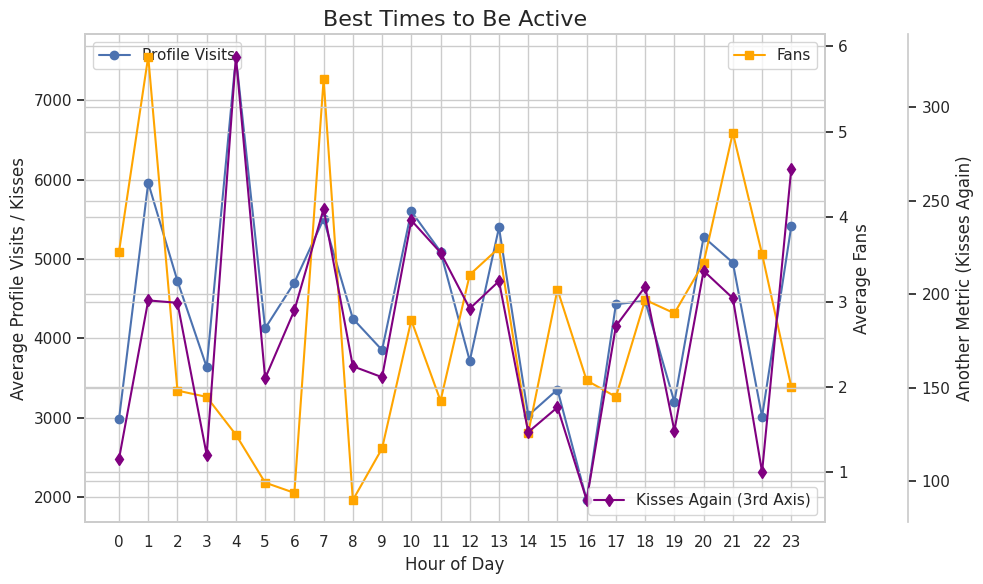

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'timing_analysis' has already been computed
# Set the plot style
sns.set(style="whitegrid")

# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Profile Visits on the primary y-axis
ax1.plot(timing_analysis.index, timing_analysis['counts_profileVisits'], label='Profile Visits', color='b', marker='o')

# Create a secondary y-axis to plot Fans
ax2 = ax1.twinx()
ax2.plot(timing_analysis.index, timing_analysis['counts_fans'], label='Fans', color='orange', marker='s')

# If you want a third y-axis, you can create another twin axis
ax3 = ax1.twinx()

# Adjust the position of ax3 to avoid overlap
ax3.spines['right'].set_position(('outward', 60))

# Plot another metric on the third axis (e.g., counts_kisses again)
ax3.plot(timing_analysis.index, timing_analysis['counts_kisses'], label='Kisses Again (3rd Axis)', color='purple', marker='d')

# Customize the chart
ax1.set_title("Best Times to Be Active", fontsize=16)
ax1.set_xlabel("Hour of Day", fontsize=12)
ax1.set_ylabel("Average Profile Visits / Kisses", fontsize=12)
ax2.set_ylabel("Average Fans", fontsize=12)
ax3.set_ylabel("Another Metric (Kisses Again)", fontsize=12)

# Add legends for all axes
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax3.legend(loc="lower right")

# Set the x-axis ticks to be from 0 to 23 for each hour
ax1.set_xticks(range(24))

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


4. First Message - Crafting the Perfect Opening Line

*   Hypothesis: Users who engage in chats are more likely to receive profile visits and fans.
*   Implementation: Analyze the correlation between flirtInterests_chat and engagement metrics.



In [ ]:
first_message_analysis = users_instances[['flirtInterests_chat', 'counts_profileVisits', 'counts_kisses', 'counts_fans']].corr()

print("\n### Impact of First Message ###")
first_message_analysis



### Impact of First Message ###


,flirtInterests_chat,counts_profileVisits,counts_kisses,counts_fans
flirtInterests_chat,1.000000,0.085575,0.068401,-0.021883
counts_profileVisits,0.085575,1.000000,0.885858,0.133878
counts_kisses,0.068401,0.885858,1.000000,0.125454
counts_fans,-0.021883,0.133878,0.125454,1.000000


5. Optimize Profile and Messaging

*   Hypothesis: Users who are VIPs, influencers, or have optimized profiles (e.g., verified, highlighted) get more matches and engagement.
*   Implementation: Compare engagement metrics for users with statuses like isVip, isInfluencer, verified, and isHighlighted.

In [ ]:
# Analyze impact of user statuses on engagement
optimization_columns = ['isVip', 'isInfluencer', 'verified', 'isHighlighted']
optimization_analysis = {}

for col in optimization_columns:
    status_analysis = data.groupby(col)[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()
    optimization_analysis[col] = status_analysis

# Print the analysis for each optimization factor
for col, analysis in optimization_analysis.items():
    print(f"\n### Impact of {col} on Engagement ###")
    print(analysis)



### Impact of isVip on Engagement ###
       counts_profileVisits  counts_kisses  counts_fans
isVip                                                  
0               3681.867749     155.475638     2.344161
1               4939.978022     220.879121     2.439560

### Impact of isInfluencer on Engagement ###
              counts_profileVisits  counts_kisses  counts_fans
isInfluencer                                                  
0                      3710.706045     156.974811     2.346348

### Impact of verified on Engagement ###
          counts_profileVisits  counts_kisses  counts_fans
verified                                                  
0                  2963.914323     124.064985     2.166182
1                  6344.488027     273.041049     2.981756

### Impact of isHighlighted on Engagement ###
               counts_profileVisits  counts_kisses  counts_fans
isHighlighted                                                  
0                       3696.775427     156.16365